# Import Libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [84]:
cv_dataset=pd.read_csv('/content/corona_virus.csv' , encoding="ISO-8859-1")
print(cv_dataset.head())

  Country,Other   Total Cases New Cases Total Deaths  New Deaths  \
0           USA  10,66,27,427       NaN    11,59,824         NaN   
1         India   4,49,39,515       NaN     5,31,508         NaN   
2        France   3,99,80,570       NaN     1,66,556         NaN   
3       Germany   3,84,03,667       NaN     1,73,044         NaN   
4        Brazil   3,74,49,418       NaN     7,01,494         NaN   

  Total Recovered New Recovered Active Cases Serious,Critical  \
0    10,45,49,551           NaN     9,18,052            1,368   
1     4,43,56,693           NaN       51,314              NaN   
2     3,96,77,000           NaN     1,37,014              869   
3     3,81,92,900           600       37,723              NaN   
4     3,62,49,161           NaN     4,98,763              NaN   

  Tot Cases/1M pop Deaths/1M pop     Total Tests Tests/1M pop      Population  
0         3,18,476         3,464  1,17,68,34,935    35,14,983    33,48,05,269  
1           31,948           378    92,6

In [85]:
# shape
cv_dataset.shape

(232, 14)

# Data Preprocessing - EDA

In [86]:
# identify the null values columns name 
cv_dataset.isna().sum()

Country,Other         0
Total Cases           0
New Cases           227
Total Deaths          6
New Deaths          230
Total Recovered      21
New Recovered       220
Active Cases         19
Serious,Critical    105
Tot Cases/1M pop      2
Deaths/1M pop         8
Total Tests          19
Tests/1M pop         19
Population            3
dtype: int64

In [87]:
cv_dataset.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"10,66,27,427",NaN,"11,59,824",NaN,"10,45,49,551",NaN,"9,18,052","1,368","3,18,476","3,464","1,17,68,34,935","35,14,983","33,48,05,269"
1,India,"4,49,39,515",NaN,"5,31,508",NaN,"4,43,56,693",NaN,"51,314",NaN,"31,948",378,"92,64,96,579","6,58,663","1,40,66,31,776"
2,France,"3,99,80,570",NaN,"1,66,556",NaN,"3,96,77,000",NaN,"1,37,014",869,"6,09,604","2,540","27,14,90,188","41,39,547","6,55,84,518"
3,Germany,"3,84,03,667",NaN,"1,73,044",NaN,"3,81,92,900",600,"37,723",NaN,"4,57,821","2,063","12,23,32,384","14,58,359","8,38,83,596"
4,Brazil,"3,74,49,418",NaN,"7,01,494",NaN,"3,62,49,161",NaN,"4,98,763",NaN,"1,73,897","3,257","6,37,76,166","2,96,146","21,53,53,593"


In [88]:
cv_dataset.columns

Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population'],
      dtype='object')

### Split the Columns

In [89]:
cv_dataset=cv_dataset.replace(to_replace =',', value = '', regex = True)
cv_dataset['Total Cases']=cv_dataset['Total Cases'].astype(np.float)
cv_dataset['Total Deaths']=cv_dataset['Total Deaths'].astype(np.float)
cv_dataset['Total Recovered']=cv_dataset['Total Recovered'].astype(np.float)
cv_dataset['Active Cases']=cv_dataset['Active Cases'].astype(np.float)
cv_dataset['Serious,Critical']=cv_dataset['Serious,Critical'].astype(np.float)
# cv_dataset['Tot Cases/1M pop']=cv_dataset['Tot Cases/1M pop'].astype(np.float)
cv_dataset['Deaths/1M pop']=cv_dataset['Deaths/1M pop'].astype(np.float)
cv_dataset['Total Tests']=cv_dataset['Total Tests'].astype(np.float)
cv_dataset['Tests/1M pop']=cv_dataset['Tests/1M pop'].astype(np.float)
cv_dataset['Population']=cv_dataset['Population'].astype(np.float)

<ipython-input-89-34eaec324b9a>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv_dataset['Total Cases']=cv_dataset['Total Cases'].astype(np.float)
<ipython-input-89-34eaec324b9a>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv_dataset['Total Deaths']=cv_dataset['Total Deaths'].astype(np.float)
<ipython-input-89-34eaec324b9a>:4: Dep

In [90]:
# replace the null values with '0'
cv_dataset=cv_dataset.fillna(0)

In [91]:
# rename the columns name
cv_dataset=cv_dataset.rename(columns={'Country,Other' : 'Country_name', 'Total Cases' : 'Total_Case', 'New Cases' : 'New_Cases', 'Total Deaths' : 'Total_Deaths','New Deaths' : 'New Deaths', 'Total Recovered' : 'Total_Recovered', 'New Recovered' : 'New Recovered', 'Active Cases' : 'Active_Cases','Serious,Critical' : 'Critical_Cases', 'Tot Cases/1M pop' : 'Tot Cases', 'Deaths/1M pop':'Deaths pop', 'Total Tests' : 'Totals_Deaths','Tests/1M pop' : 'Tests_pop', 'Population' : 'Population'})
print(cv_dataset)

       Country_name   Total_Case New_Cases  Total_Deaths  New Deaths  \
0               USA  106627427.0         0     1159824.0         0.0   
1             India   44939515.0         0      531508.0         0.0   
2            France   39980570.0         0      166556.0         0.0   
3           Germany   38403667.0         0      173044.0         0.0   
4            Brazil   37449418.0         0      701494.0         0.0   
..              ...          ...       ...           ...         ...   
227    Vatican City         29.0         0           0.0         0.0   
228  Western Sahara         10.0         0           1.0         0.0   
229      MS Zaandam          9.0         0           2.0         0.0   
230         Tokelau          5.0         0           0.0         0.0   
231          Total:  687021745.0     14511     6863517.0         3.0   

     Total_Recovered New Recovered  Active_Cases  Critical_Cases  \
0        104549551.0             0      918052.0          1368.0   

# Visulization

## EDA- Apply Top 10 Records

In [92]:
cv_dataset=cv_dataset.iloc[:231 , :]

### Total Case

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'India'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'S. Korea'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'UK'),
  Text(9, 0, 'Russia')])

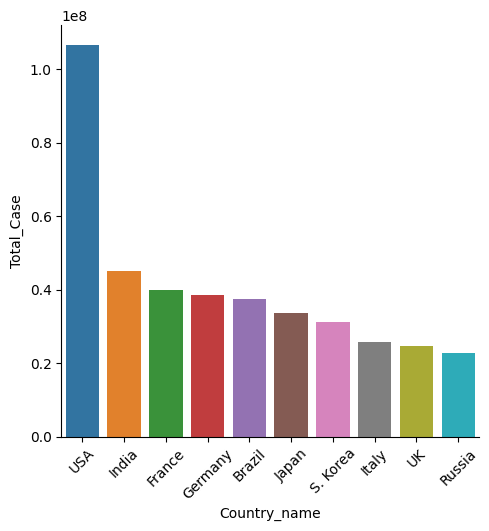

In [93]:
cv_dataset_total_case_top_values=cv_dataset.sort_values('Total_Case' , ascending=False).head(10)
sns.catplot(data=cv_dataset_total_case_top_values , x='Country_name' , y='Total_Case' , kind='bar')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Russia'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'UK'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'France')])

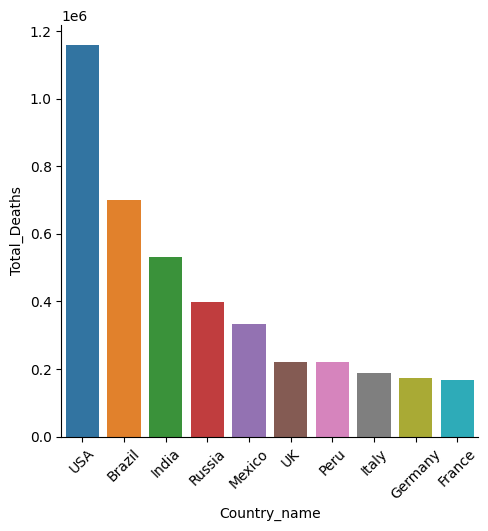

In [94]:
cv_dataset_total_top_values=cv_dataset.sort_values('Total_Deaths' , ascending=False).head(10)

sns.catplot(data=cv_dataset_total_top_values , x='Country_name' , y='Total_Deaths' , kind='bar')
plt.xticks(rotation = 45)

### Total_Recovered

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'India'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'S. Korea'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'UK'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Japan')])

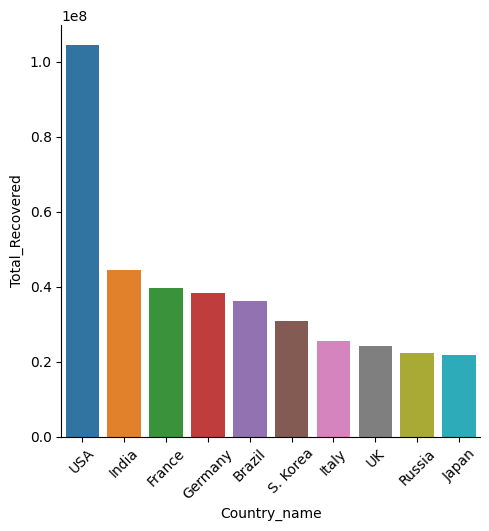

In [95]:
cv_dataset_total_top_values=cv_dataset.sort_values('Total_Recovered' , ascending=False).head(10)

sns.catplot(data=cv_dataset_total_top_values , x='Country_name' , y='Total_Recovered' , kind='bar')
plt.xticks(rotation = 45)

### Active_Cases

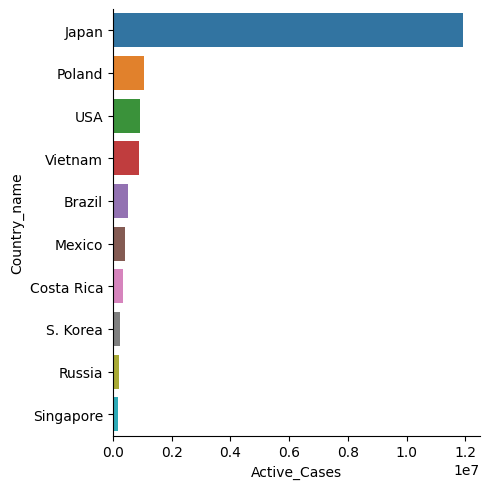

In [96]:
cv_dataset_total_case=cv_dataset.sort_values('Active_Cases' , ascending=False).head(10)
sns.catplot(data=cv_dataset_total_case , x='Active_Cases' , y='Country_name' ,kind='bar')

In [97]:
cv_dataset['New Recovered']=cv_dataset['New Recovered'].astype(np.float)

<ipython-input-97-8918137a4f3c>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv_dataset['New Recovered']=cv_dataset['New Recovered'].astype(np.float)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S. Korea'),
  Text(1, 0, 'Greece'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Peru'),
  Text(6, 0, 'Finland'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Ireland')])

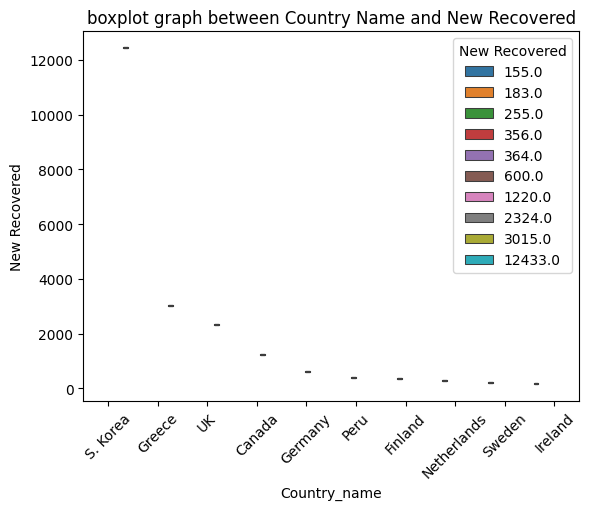

In [98]:
cv_dataset_reco=cv_dataset.sort_values('New Recovered' , ascending=False).head(10)
sns.boxplot(x='Country_name' , y='New Recovered', data=cv_dataset_reco , hue='New Recovered')
plt.title('boxplot graph between Country Name and New Recovered')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'S. Korea'),
  Text(1, 0, 'Greece'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Peru'),
  Text(6, 0, 'Finland'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Ireland')])

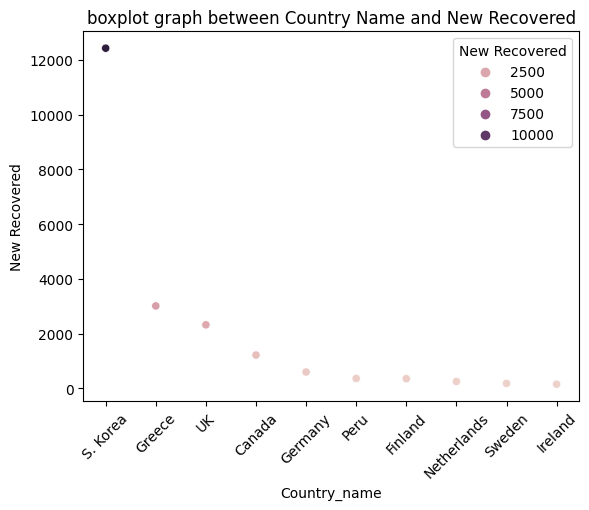

In [99]:
cv_dataset_reco=cv_dataset.sort_values('New Recovered' , ascending=False).head(10)
sns.scatterplot(x='Country_name' , y='New Recovered', data=cv_dataset_reco , hue='New Recovered')
plt.title('boxplot graph between Country Name and New Recovered')
plt.xticks(rotation=45)

Label Encoding

In [100]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
cv_dataset['Country_name']=le.fit_transform(cv_dataset['Country_name'])

<ipython-input-101-1606434fd5e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cv_dataset.corr() , cmap='autumn' , annot=True)


Text(0.5, 1.0, 'Heatmap of Dataset')

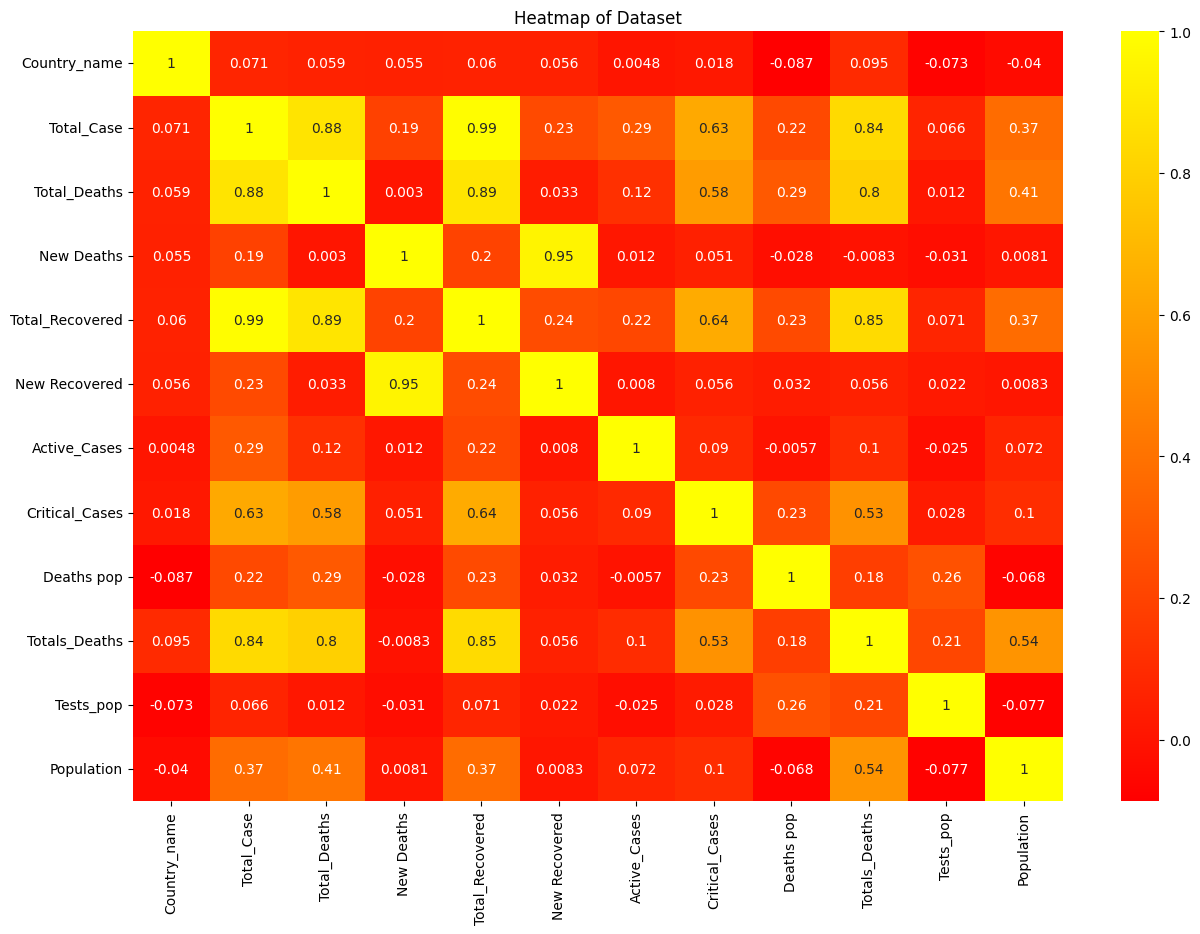

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(cv_dataset.corr() , cmap='autumn' , annot=True)
plt.title('Heatmap of Dataset')

# Feature Engineering

In [102]:
cv_dataset.columns

Index(['Country_name', 'Total_Case', 'New_Cases', 'Total_Deaths', 'New Deaths',
       'Total_Recovered', 'New Recovered', 'Active_Cases', 'Critical_Cases',
       'Tot Cases/1M pop', 'Deaths pop', 'Totals_Deaths', 'Tests_pop',
       'Population'],
      dtype='object')

In [103]:
cv_dataset=cv_dataset.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cv_dataset)
scaled_df = pd.DataFrame(scaled_data,
                         columns=cv_dataset.columns)
scaled_df.head()

,Country_name,Total_Case,New_Cases,Total_Deaths,New Deaths,Total_Recovered,New Recovered,Active_Cases,Critical_Cases,Tot Cases/1M pop,Deaths pop,Totals_Deaths,Tests_pop,Population
0,0.943478,1.000000,0.0,1.000000,0.0,1.000000,0.000000,0.077139,1.000000,0.451006,0.530069,1.000000,0.150844,0.231144
1,0.408696,0.421463,0.0,0.458266,0.0,0.424265,0.000000,0.004312,0.000000,0.045243,0.057842,0.787278,0.028266,0.971115
2,0.313043,0.374956,0.0,0.143605,0.0,0.379504,0.000000,0.011513,0.635234,0.863283,0.388676,0.230695,0.177647,0.045278
3,0.339130,0.360167,0.0,0.149198,0.0,0.365309,0.048259,0.003170,0.000000,0.648338,0.315685,0.103950,0.062585,0.057912
4,0.113043,0.351217,0.0,0.604828,0.0,0.346718,0.000000,0.041909,0.000000,0.246262,0.498393,0.054193,0.012709,0.148676
